In [73]:
import numpy as np
import matplotlib.pyplot as plt

(101,)
[ 0  0  0  0  0  1  1  2  3  2  2  6  1  6  6  9 14 15 16 22 24 24 31 42
 37 34 50 50 47 45 55 39 49 54 44 28 29 38 33 24 17 17 16 14  8  9 11  6
  4  6  5  1  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]
<type 'numpy.ndarray'>
coef.shape= (13,)


/home/utsumi/miniconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:45: RankWarning: Polyfit may be poorly conditioned
/home/utsumi/miniconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


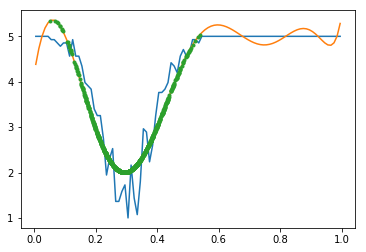

In [110]:
def unit(x,Min,Max):
    return (x-Min)/(Max-Min)

def polyfit_coef(a1obs, degree):
    nbind = 100
    a1bnd = np.arange(nbins+1).astype('float32')/(nbins)
    frequency,_ = np.histogram(a1obs, bins=a1bnd)
    g = (wedge - 1)*(-frequency/float(frequency.max()) +1)+1
    x = 0.5*(a1bnd[:-1]+a1bnd[1:])
    coef = np.polyfit(x,g,deg=degree)  # highest degree coef first.
    print 'coef.shape=',coef.shape
    return coef[::-1]    

def weight_func(a1obs, coef):
    degree = len(coef)-1
    y = np.zeros(len(a1obs))
    for i in range(degree+1):
        y = y + coef[i]*(a1obs**i)
    return y

nobs_all = 10000
nobs     = 1000
nbins    = 100
degree   = 12
wedge    = 5
np.random.seed(0)
a1obs_all = np.random.normal(size=nobs)
#Min, Max  = a1obs_all.min(), a1obs_all.max()
Min, Max  = a1obs_all.min()*1.2, a1obs_all.max()*3
a1obs_all = unit(a1obs_all, Min, Max)
a1obs  = a1obs_all[:nobs]

a1noise = np.random.normal(size=nobs)
a1noise = unit(a1noise,Min,Max)*0.01
a1pred  = unit(a1obs + a1noise, Min,Max)

a1bnd = np.arange(nbins+1).astype('float32')/(nbins)
print a1bnd.shape
frequency,_ = np.histogram(a1obs, bins=a1bnd)
print frequency
print type(frequency)
g = (wedge - 1)*(-frequency/float(frequency.max()) +1)+1
x = 0.5*(a1bnd[:-1]+a1bnd[1:])

coef = np.polyfit(x,g,deg=degree)  # highest degree coef first.
coef = coef[::-1]
y = np.zeros(len(x))
for i in range(degree+1):
    y = y + coef[i]*x**i

#print x.shape, frequency.shape
plt.plot(x,g)
plt.plot(x,y)

coef2 = polyfit_coef(a1obs, degree)
g = weight_func(a1obs, coef)
plt.plot(a1obs,g,'.')
